In [24]:
# Importo la función load_digits desde sklearn.datasets,
# esta función me permite cargar un dataset de dígitos escritos a mano
from sklearn.datasets import load_digits

# Cargar el dataset y guardarlo en la variable "digits"
# aquí ya tengo disponible toda la información (imágenes, targets, etc.)
digits = load_digits()

# Con .keys() veo qué llaves/elementos contiene este dataset
digits.keys()

# esto me regresa algo como:
# dict_keys([
#     'data', 'target', 'frame',
#     'feature_names', 'target_names', 'images',
#     'DESCR'
# ])
#
# básicamente aquí estoy viendo las partes principales del dataset:
# - 'data' son los píxeles (cada imagen convertida a números)
# - 'target' son las etiquetas de qué número es cada imagen (0-9)
# - 'images' son las imágenes originales en matriz 8x8
# - 'DESCR' trae la descripción del dataset


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [25]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [26]:
# Defino el índice que quiero seleccionar del dataset
# en este caso pongo 0, así que voy a trabajar con la primera imagen
index = 0


In [27]:
# Obtengo la imagen correspondiente al índice que elegí
# 'digits.images' trae las imágenes en forma de matriz 8x8
image = digits.images[index]

# Obtengo la etiqueta real de esa imagen
# 'digits.target' es el número que representa esa imagen
label = digits.target[index]


In [28]:
print(image) #Se la matriz de la imagen


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


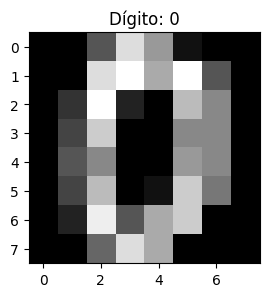

In [29]:


# Importo matplotlib para poder visualizar la imagen como gráfico
import matplotlib.pyplot as plt

# Creo una figura de 3x3 pulgadas (solo estética para que se vea más grande)
plt.figure(figsize=(3, 3))

# Muestro la imagen en escala de grises
plt.imshow(image, cmap=plt.cm.gray)

# Pongo un título arriba de la imagen indicando qué número representa
plt.title(f'Dígito: {label}')

# Renderizo / muestro la imagen en pantalla
plt.show()


In [30]:
# Importo TensorFlow y las funciones necesarias para dividir los datos
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Divido mi dataset en entrenamiento y prueba
# X = los datos (características) → aquí son los píxeles de cada dígito
# y = las etiquetas reales (qué número es cada imagen)
# test_size=0.2 = 20% se va para prueba y 80% para entrenar
# random_state=42 para que la división sea siempre igual (reproducible)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# Convierto las etiquetas a "one-hot encoding"
# porque en redes neuronales necesito las etiquetas en forma de vectores binarios
# por ejemplo: el 3 sería [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [31]:
# Imprimo la forma (shape) de X_train
# para ver cuántas muestras tengo para entrenar y cuántas características tiene cada imagen
print(X_train.shape)

# Imprimo la forma (shape) de X_test
# para ver cuántas muestras quedaron para prueba y su dimensionalidad
print(X_test.shape)


(1437, 64)
(360, 64)


In [32]:
# Reacomodo (reshape) la primera imagen de X_train a una matriz 8x8
# porque X_train está en forma de vectores de 64 valores (1x64)
# pero la imagen original era de 8x8 (64 píxeles)
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))

# Imprimo la matriz ya re-formada para visualizarla como imagen nuevamente
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizo los datos para que todas las características (píxeles)
# tengan valores con media 0 y desviación estándar 1.
# Esto ayuda a que la red neuronal aprenda mejor y más rápido.
scaler = StandardScaler()

# Ajusto el escalador solo con los datos de entrenamiento (fit)
# y luego transformo X_train (fit_transform)
X_train = scaler.fit_transform(X_train)

# Ahora uso el mismo escalador ya entrenado para transformar X_test
# (IMPORTANTE: aquí no se hace .fit porque no debo aprender del test)
X_test = scaler.transform(X_test)


In [34]:
# Vuelvo a reacomodar (reshape) la primera imagen del set de entrenamiento
# para verla nuevamente como matriz de 8x8, ya con los valores normalizados
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))

# Redondeo los valores a 2 decimales para que la matriz se vea más "bonita"
# esto solo es para visualización, no afecta el modelo
reshaped_tensor = tf.floor(reshaped_tensor * 100) / 100

# Imprimo la matriz ya redondeada para visualizar cómo quedan los valores
print(reshaped_tensor)


tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [35]:
# Redimensiono el tensor para regresar las imágenes a su forma original 8x8
# Antes X_train y X_test estaban como vectores planos de 64 valores (shape: n_samples, 64)
# Ahora los convierto a matrices 8x8 para cada imagen (shape: n_samples, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Creo el modelo de red neuronal CNN (Convolutional Neural Network)
model = Sequential([
    # Primera capa convolucional
    # 32 filtros de 3x3, activación ReLU
    # input_shape=(8, 8, 1) → imagen 8x8 y 1 canal porque es escala de grises
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),

    # Capa de MaxPooling para reducir la dimensión espacial
    MaxPooling2D(pool_size=(2, 2)),

    # Aplano la salida para pasar a capas densas (fully connected)
    Flatten(),

    # Capa oculta densa con 128 neuronas y activación ReLU
    Dense(128, activation='relu'),

    # Capa de salida con 10 neuronas (porque son dígitos del 0 al 9)
    # softmax para obtener probabilidades por clase
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
from tensorflow.keras.optimizers import Adam

# Defino la tasa de aprendizaje que quiero usar para el optimizador
# mientras más pequeña, más "suave" aprende el modelo
learning_rate = 0.001

# Creo el optimizador Adam usando esa tasa de aprendizaje
# Adam se usa mucho porque combina lo mejor de SGD + momentum + RMSprop
adam_optimizer = Adam(learning_rate=learning_rate)


In [38]:
# Compilo el modelo indicando:
# - el optimizador que va a ajustar los pesos (aquí uso Adam)
# - la función de pérdida que quiero minimizar (categorical_crossentropy
#   porque tengo clasificación multiclase con one-hot encoding)
# - y la métrica que voy a monitorear (accuracy = qué tan bien acierta)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [39]:
# Entreno el modelo con mis datos de entrenamiento
history = model.fit(
    X_train, y_train,

    # número de veces que el modelo verá todo el dataset completo
    epochs=10,

    # cantidad de muestras que se procesan antes de actualizar los pesos
    batch_size=32,

    # uso el 20% de los datos de entrenamiento para validación interna
    # esto me permite ver si el modelo está aprendiendo bien o solo memorizando
    validation_split=0.2
)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3867 - loss: 1.9969 - val_accuracy: 0.8160 - val_loss: 0.9512
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8727 - loss: 0.7048 - val_accuracy: 0.8993 - val_loss: 0.4223
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9350 - loss: 0.2810 - val_accuracy: 0.9306 - val_loss: 0.3154
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9723 - loss: 0.1540 - val_accuracy: 0.9375 - val_loss: 0.2231
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9767 - loss: 0.1192 - val_accuracy: 0.9618 - val_loss: 0.1718
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9868 - loss: 0.0807 - val_accuracy: 0.9549 - val_loss: 0.1489
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9903 - loss: 0.0566 - val_accuracy: 0.9618 - val_loss: 0.1323
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9927 - loss: 0.0540 - val_accuracy: 0.9722 - val_loss

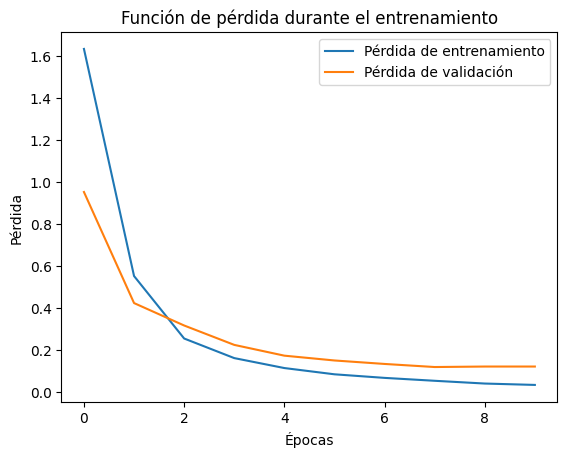

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [41]:
# Evalúo el modelo con los datos de prueba
# aquí el modelo ya no aprende, solo mide qué tan bien generaliza
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimo la pérdida y la exactitud obtenida en el set de prueba
# esto me dice qué tan bien clasifica dígitos que nunca vio antes
print(f'Loss: {loss}, Accuracy: {accuracy}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.0686  
Loss: 0.0717170387506485, Accuracy: 0.9750000238418579


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

# Uso el modelo ya entrenado para predecir las clases del conjunto de prueba
y_pred = model.predict(X_test)

# Tomo la clase más probable para cada predicción (softmax da probabilidades)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convierto y_test nuevamente a etiquetas (porque estaba en one-hot)
y_test_classes = np.argmax(y_test, axis=1)

# Calculo la matriz de confusión → me dice qué clases se confunden entre sí
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Calculo la sensibilidad (recall) por clase
# el recall mide qué tanto el modelo detecta correctamente cada dígito
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


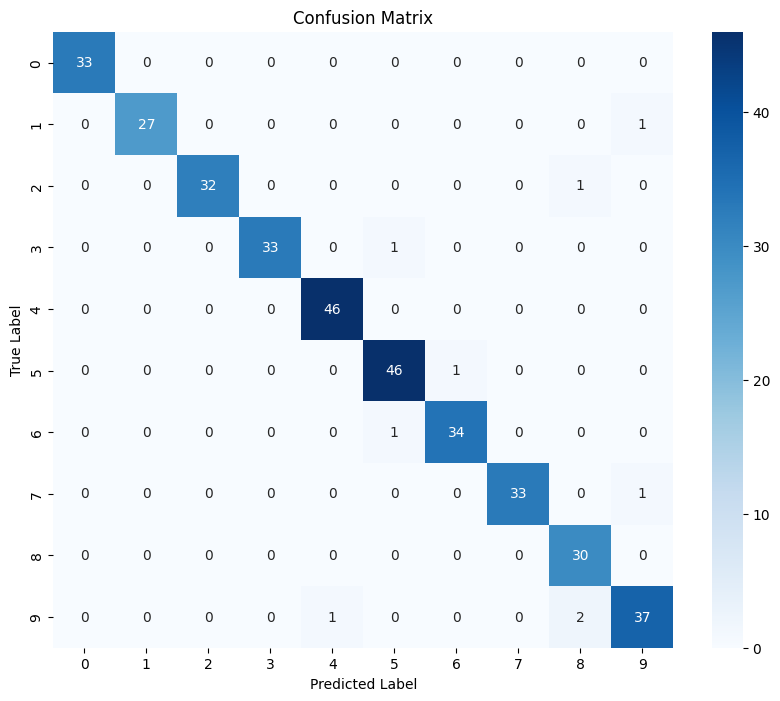

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.925


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

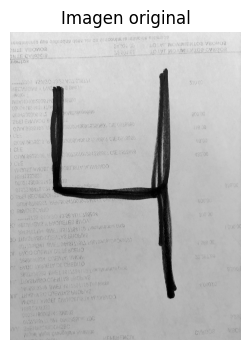

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

# Especifico la ruta donde está guardada mi imagen
# (esta imagen debería ser un número escrito a mano)
ruta = "/content/mi_numero.png"

# Abro la imagen y la convierto a escala de grises
# "L" = modo de 8 bits en blanco y negro
img = Image.open(ruta).convert("L")

# Muestro la imagen original para visualizarla
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")  # quito los ejes para que se vea más limpio
plt.show()


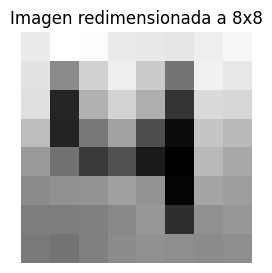

In [45]:
import matplotlib.pyplot as plt

# redimensiono la imagen a 8x8 píxeles
# esto es importante porque el dataset original (digits) también es 8x8
# así el modelo podrá procesar mi imagen igual que las demás
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# muestro la imagen redimensionada para verificar visualmente que quedó bien
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional: guardo esta imagen en disco por si quiero usarla más adelante
img_resized.save("imagen_8x8.png")


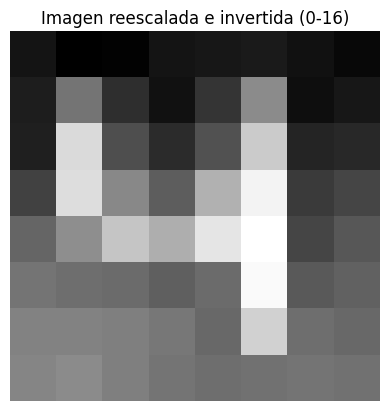

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Convierto la imagen (8x8) a un arreglo NumPy de tipo float32
img_array = np.array(img_resized).astype("float32")

# Reescalo los valores de píxeles:
# la imagen está originalmente en escala 0-255 (como cualquier imagen normal)
# pero el dataset "digits" usa escala 0-16
# por eso convierto los valores con ( / 255 * 16 )
# y además invierto la escala para que coincida con digits
# (en digits el fondo es negro = 0)
img_array = 16 - (img_array / 255 * 16)

# muestro visualmente la imagen ya reescalada e invertida
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


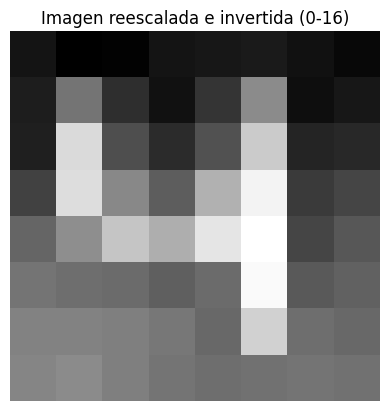

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Convierto la imagen (8x8) a un arreglo NumPy de tipo float32
img_array = np.array(img_resized).astype("float32")

# Reescalo los valores de píxeles:
# la imagen está originalmente en escala 0-255 (como cualquier imagen normal)
# pero el dataset "digits" usa escala 0-16
# por eso convierto los valores con ( / 255 * 16 )
# y además invierto la escala para que coincida con digits
# (en digits el fondo es negro = 0)
img_array = 16 - (img_array / 255 * 16)

# muestro visualmente la imagen ya reescalada e invertida
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


In [48]:
from sklearn.preprocessing import StandardScaler

# Creo un nuevo escalador para normalizar mi imagen igual que los datos del modelo
scaler = StandardScaler()

# tomo mi imagen ya convertida a matriz 8x8 (img_array)
# y la guardo en img_flat para dejar claro que voy a normalizar esto
img_flat = img_array

# aplico StandardScaler a la imagen para llevarla a la misma escala
# (aunque idealmente yo debería usar el *mismo scaler* que usé para el X_train)
# aquí entreno el scaler solo con esta imagen y la transformo
img_scaled = scaler.fit_transform(img_flat)

# redimensiono la imagen a forma (1, 8, 8)
# 1 porque será un solo ejemplo (un solo dígito a predecir)
# 8x8 porque es la forma de la imagen
img_tensor = img_scaled.reshape(1, 8, 8)
